# **Proyek Analisis Data: *E-Commerce Public Dataset***
- **Nama:** Muhammad Afief Abdurrahman
- **Email:** M002D4KY1550@bangkit.academy
- **ID Dicoding:** mafiefa

## **I. Menentukan Pertanyaan Bisnis**
---

Berikut adalah pertanyaan yang akan menentukan arah analisa terhadap dataset.
1. Bagaimana performa penjualan masing-masing kategori produk?
2. Bagaimana daerah sebaran customer?

## **II. Import Semua Packages/Library yang Digunakan**
---

Library ini akan digunakan dalam proses analisa serta visualisasi.

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## **III. Data Wrangling**
---

Proses *data wrangling* terdiri dari beberapa tahapan, yaitu *gathering data*, *assessing data*, dan *cleaning data*.

Dataset yang digunakan dalam analisa ini didapat dari [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), skema dataset dapat dilihat pada [gambar berikut](https://i.imgur.com/HRhd2Y0.png).

### **III.1. Gathering Data**

In [247]:
# Mengambil data mengenai customer
df_customers = pd.read_csv('/content/dataset/customers_dataset.csv')

In [248]:
# Mengambil data mengenai geolokasi kota Brazil
df_geolocation = pd.read_csv('/content/dataset/geolocation_dataset.csv')

In [249]:
# Mengambil data mengenai order, termasuk detail produk yang terjual, pembayaran, review, dan lainnya
df_orders = pd.read_csv('/content/dataset/orders_dataset.csv')
df_order_items = pd.read_csv('/content/dataset/order_items_dataset.csv')
df_order_payments = pd.read_csv('/content/dataset/order_payments_dataset.csv')
df_order_reviews = pd.read_csv('/content/dataset/order_reviews_dataset.csv')

In [250]:
# Mengambil data mengenai produk yang dijual
df_products = pd.read_csv('/content/dataset/products_dataset.csv')

# Nama dari masing-masing produk masih dalam bahasa Brazil, berikut adalah data mengenai translasi nama masing-masing produk dalam bahasa Inggris
df_product_category_name_translation = pd.read_csv('/content/dataset/product_category_name_translation.csv')

In [251]:
# Mengambil data penjual
df_sellers = pd.read_csv('/content/dataset/sellers_dataset.csv')

### **III.2. Assesing Data**

Proses ini merupakan proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

#### **III.2.1. Assessing tabel `df_customers`**

In [252]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [253]:
# Cek overview dataframe customer
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Jumlah baris dengan *non-null value* bernilai sama setiap kolomnya. Tipe data masing-masing kolom juga cukup menggambarkan isi dari kolom tersebut.

In [254]:
# Cek duplicated rows pada tabel df_customers
df_customers.duplicated().sum()

0

#### **III.2.2. Assessing tabel `df_geolocation`**

In [255]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [256]:
# Cek overview dataframe geolokasi
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Sama seperti pada dataframe customer, jumlah baris dengan *non-null value* konsisten dengan tiap kolom. Tipe data masing-masing kolom juga cukup menggambarkan isi dari kolom tersebut.

In [257]:
# Cek duplicated rows pada tabel df_geolocation
df_geolocation.duplicated().sum()

261831

In [258]:
duplicates = df_geolocation[df_geolocation.duplicated()]

print("Duplicated rows: ")
duplicates

Duplicated rows: 


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Terdapat cukup banyak baris data geolocation yang terduplikasi, yaitu sekitar 261,831 baris.

#### **III.2.3. Assessing data order**

Menurut [dokumentasi](https://i.imgur.com/HRhd2Y0.png) dari [sumber dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) yang digunakan, data order terpisah menjadi beberapa tabel, yaitu `df_orders`, `df_order_items`, `df_order_payments`, dan `df_order_reviews`. Kita akan melihat overview masing-masing tabel terlebih dahulu.

##### **III.2.3.1. Assessing tabel `df_order_items`**

In [259]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [260]:
# Cek overview dataframe order
# Melihat tabel df_order_items secara khusus
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Jumlah *non-null value* sudah sesuai, namun terdapat satu kolom yang tipe datanya tidak sesuai, yaitu kolom `shipping_limit_date` yang seharusnya memiliki tipe *datetime*.

In [261]:
# Cek duplicated rows pada tabel df_order_items
df_order_items.duplicated().sum()

0

In [262]:
# Melihat statistik deskriptif dari tabel df_order_items
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Produk dengan harga 6,735 terlihat seperti outlier. Kita akan lihat 10 produk lain dengan harga tertinggi untuk menentukannya.

In [263]:
df_order_items.sort_values(by="price", ascending=False)['price'].head(10)

3556      6735.00
112233    6729.00
107841    6499.00
74336     4799.00
11249     4690.00
62086     4590.00
29193     4399.87
45843     4099.99
78310     4059.00
59137     3999.90
Name: price, dtype: float64

Ternyata 10 produk dengan harga tertinggi memang mendekati harga produk tertinggi, sehingga tidak dapat disebut sebagai outlier.

##### **III.2.3.2. Assessing tabel `df_order_payments`**

In [264]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [265]:
# Melihat tabel df_order_payments secara khusus
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [266]:
# Cek duplicated rows pada tabel df_order_payments
df_order_payments.duplicated().sum()

0

In [267]:
# Cek statistik deskriptif dari kolom numerik
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Pembayaran maksimum sebesar 13,664 terlihat seperti outlier. Dalam memastikannya, kita harus melihat beberapa pembayaran tertinggi lainnya.

In [268]:
# Melihat 10 pembayaran tertinggi
df_order_payments.sort_values(by="payment_value", ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
62409,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54
43232,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.34
70320,b4c4b76c642808cbe472a32b86cddc95,1,credit_card,5,4809.44
6440,199af31afc78c699f0dbf71fb178d4d4,1,credit_card,8,4764.34
67546,8dbc85d1447242f3b127dda390d56e19,1,credit_card,8,4681.78


Ternyata 10 pembayaran tertinggi memang berada pada rentang ribuan, sehingga pembayaran sebesar 13,664 bukanlah suatu outlier. Tabel `df_order_payments` tampaknya sudah sesuai.

##### **III.2.3.3. Assessing tabel `df_order_reviews`**

In [269]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [270]:
# Melihat tabel df_order_reviews secara khusus
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Kita lihat bahwa terdapat banyak customer yang tidak memasukkan judul serta pesan pada review yang mereka berikan. Selain itu, tipe data kolom `review_creation_date` juga belum sesuai.

In [271]:
# Melihat berapa banyak customer yang tidak memberikan pesan (dan judul review) pada review mereka
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat cukup banyak customer yang tidak meninggalkan pesan pada review mereka, yaitu 58,247 customer.

In [272]:
# Cek duplicated rows pada tabel df_order_reviews
df_order_reviews.duplicated().sum()

0

In [273]:
# Cek statistika deskriptif dari kolom review_score
df_order_reviews['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

Tampaknya tabel `df_order_reviews` sudah sesuai.

##### **III.2.3.4. Assessing tabel `df_orders`**

In [274]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [275]:
# Melihat tabel df_orders secara khusus
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat beberapa baris pada kolom `order_approved_at` yang bernilai *null*, hal ini dapat berarti bahwa terdapat beberapa order yang tidak dikonfirmasi oleh toko, atau dibatalkan oleh customer.

Kemudian, kita dapat melihat bahwa terdapat perbedaan jumlah yang signifikan pada jumlah baris dengan *null value* pada kolom `order_delivered_carrier_date` dan kolom `order_delivered_customer_date`. Hal ini berarti terdapat beberapa order yang tidak dikirimkan kepada kurir maupun customer.

In [276]:
# Melihat seberapa banyak order yang tidak dikirimkan kepada kurir dan customer, serta order yang tidak dikonfirmasi oleh toko.
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat 160 order yang tidak dikonfirmasi oleh toko, 1,783 order yang tidak/belum dikirimkan kepada kurir, dan 2,965 order yang tidak/belum dikirimkan kepada kurir.

In [277]:
# Cek duplicated rows pada df_orders
df_orders.duplicated().sum()

0

##### **III.2.3.5. Menggabungkan tabel-tabel order yang terpisah menjadi satu.**

Dengan tujuan memudahkan proses *data cleaning*, kita akan menggabungkan masing-masing tabel ke dalam suatu tabel yang disebut dengan tabel `df_orders_details`. Kita akan menggunakan *inner* join untuk mengakomodir perbedaan jumlah data pada masing-masing tabel, sehingga hanya mengambil baris yang berisi data pada kolom `order_id`.

In [278]:
# Menggabungkan tabel df_orders dengan df_order_items
df_order_details = pd.merge(df_orders, df_order_items, how="inner", on="order_id")

# Menambahkan df_order_payments
df_order_details = pd.merge(df_order_details, df_order_payments, how="inner", on="order_id")

# Menambahkan df_order_reviews
df_order_details = pd.merge(df_order_details, df_order_reviews, how="inner", on="order_id")

df_order_details.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [279]:
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [280]:
# Cek duplicated rows pada merged table
df_order_details.duplicated().sum()

0

#### **III.2.4. Assessing data produk**

Menurut [dokumentasi](https://i.imgur.com/HRhd2Y0.png) dari [sumber dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) yang digunakan, data produk terpisah menjadi dua tabel, yaitu `df_product_category_name_translation` dan tabel `df_products`. Kita akan melihat overview masing-masing tabel terlebih dahulu.

##### **III.2.4.1. Assessing tabel `df_product_category_name_translation`**

In [281]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [282]:
# Melihat tabel df_product_category_name_translation secara khusus
df_product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tabel ini cukup kecil karena hanya mengandung 71 total buah baris dan 2 buah kolom.

In [283]:
# Cek duplicated rows pada table df_product_category_name_translation
df_product_category_name_translation.duplicated().sum()

0

##### **III.2.4.2. Assessing tabel `df_products`**

In [284]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [285]:
# Melihat tabel df_products secara khusus
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat beberapa kolom yang tidak memiliki informasi nama kategori, panjang nama produk, foto, dan panjang deskripsi produk. Selain itu, nama kolom tersebut juga memiliki kesalahan penulisan.

In [286]:
# Melihat jumlah produk yang tidak memiliki informasi nama kategori, panjang nama produk, foto, dan panjang deskripsi produk.
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Ternyata beberapa produk juga tidak memiliki informasi mengenai dimensi seperti panjang, tinggi, lebar, dan berat!

In [287]:
df_products[df_products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Setelah ditinjau kembali, produk tersebut hanya tidak termasuk ke dalam kategori tertentu.

#### **III.2.5. Assessing tabel `df_sellers`**

In [288]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [289]:
# Melihat tabel df_sellers secara khusus
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### **III.3. Cleaning Data**

#### **III.3.1. Membersihkan data duplikasi yang ada pada tabel `df_geolocation`**

Kita lihat sebelumnya bahwa terdapat banyak sekali baris yang terduplikasi pada tabel `df_geolocation`. Kita akan menghilangkan *duplicated rows* tersebut.

In [290]:
# Menghilangkan duplicated rows dengan tetap melakukan konservasi terhadap data pertama yang muncul.
df_geolocation.drop_duplicates(keep="first", inplace=True)

df_geolocation.duplicated().sum()

0

#### **III.3.2. Mengganti nilai baris pada kolom nama kota dengan format kapital yang benar**

Tabel dengan kolom nama kota adalah tabel `df_sellers`, `df_geolocation`, dan tabel `df_customers`.

In [291]:
# Mengganti nilai baris pada kolom seller_city dalam tabel df_sellers
df_sellers['seller_city'] = df_sellers['seller_city'].apply(lambda x: x.title())

df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [292]:
# Mengganti nilai baris pada kolom customer_city dalam tabel df_customers
df_customers['customer_city'] = df_customers['customer_city'].apply(lambda x: x.title())

df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [293]:
# Mengganti nilai baris pada kolom geolocation_city dalam tabel df_geolocation
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(lambda x: x.title())

df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP


#### **III.3.3. Menghilangkan *duplicated rows* dalam tabel `df_geolocation`**

In [294]:
# Menghilangkan duplicated rows dengan mengonservasi baris pertama yang muncul
df_geolocation.drop_duplicates(keep="first", inplace=True)

df_geolocation.duplicated().sum()

0

#### **III.3.4. Mengganti format kolom pada tabel yang memiliki kolom tanggal menjadi tipe `datetime`**

Tabel dengan kolom tanggal hanya dimiliki oleh tabel `df_order_details`.

In [295]:
# Melihat tipe data kolom pada tabel df_order_details sebelum mengubah format
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [296]:
# Mengganti tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, shipping_limit_date, review_creation_date, dan review_answer_timestamp
df_order_details['order_purchase_timestamp'] = pd.to_datetime(df_order_details['order_purchase_timestamp'])
df_order_details['order_approved_at'] = pd.to_datetime(df_order_details['order_approved_at'])
df_order_details['order_delivered_carrier_date'] = pd.to_datetime(df_order_details['order_delivered_carrier_date'])
df_order_details['order_delivered_customer_date'] = pd.to_datetime(df_order_details['order_delivered_customer_date'])
df_order_details['order_estimated_delivery_date'] = pd.to_datetime(df_order_details['order_estimated_delivery_date'])
df_order_details['shipping_limit_date'] = pd.to_datetime(df_order_details['shipping_limit_date'])
df_order_details['review_creation_date'] = pd.to_datetime(df_order_details['review_creation_date'])
df_order_details['review_answer_timestamp'] = pd.to_datetime(df_order_details['review_answer_timestamp'])

# Melihat tipe data pada kolom setelah diubah
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

#### **III.3.5. Mengganti nilai NaN pada kolom `product_category_name` dalam tabel `df_products` menjadi "Uncategorized"**

In [297]:
# Mengganti baris NaN pada kolom product_category_name dengan Uncategorized
df_products['product_category_name'].fillna("Uncategorized", inplace=True)

# Cek kembali apakah masih ada nilai NaN
df_products['product_category_name'].isna().sum()

0

#### **III.3.6. Mengganti formatting nama kategori pada tabel `df_products`**

In [298]:
# Mengganti formatting nama kategori pada tabel df_products dengan mengganti karakter underscore menjadi spasi, kemudian mengubahnya menjadi title case
df_products['product_category_name'] = df_products['product_category_name'].apply(lambda x: x.replace("_", " ").title())

df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Esporte Lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Utilidades Domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## **IV. Exploratory Data Analysis (EDA)**
---

Tahapan eksplorasi terhadap dataset dengan tujuan mendapatkan berbagai insight untuk menjawab pertanyaan bisnis yang telah ditentukan sebelumnya.

### **IV.1. Eksplorasi performa penjualan produk tahun 2016-2018**



Performa penjualan masing-masing kategori produk dapat dilihat dengan meninjau jumlah kolom `product_id` pada tabel `df_order_details`, kemudian melihat `product_category_name` apa yang mengandung `product_id` tersebut.

In [299]:
# Mengurutkan produk dengan angka penjualan tertinggi
df_order_product_sell_count = df_order_details.groupby(['product_id'])['order_id'].count().reset_index(name="count").sort_values(['count'], ascending=False)

df_order_product_sell_count.head()

,product_id,count
22000,aca2eb7d00ea1a7b8ebd4e68314663af,533
19640,99a4788cb24856965c36a24e339b6058,517
8562,422879e10f46682990de24d770e7f83d,507
7320,389d119b48cf3043d311335e499d9c6b,405
7038,368c6c730842d78016ad823897a372db,395


In [300]:
# Mengganti baris product_id dengan hanya menampilkan 5 karakter pertama
df_order_product_sell_count['product_id'] = df_order_product_sell_count['product_id'].apply(lambda x: x[0:5])

df_order_product_sell_count.head()

,product_id,count
22000,aca2e,533
19640,99a47,517
8562,42287,507
7320,389d1,405
7038,368c6,395


Bagaimana dengan performa kategori produk?

In [301]:
# Buat dataframe baru yang menggabungkan informasi nama kategori produk dengan acuan product_id, kemudian group by product_category_name
df_order_category_sell_count = df_order_details.merge(df_products.drop_duplicates(), on="product_id").groupby(by="product_category_name")

# Hitung kemunculan masing-masing category dalam kolom baru bernama Count
df_order_category_sell_count = df_order_category_sell_count['order_id'].count().reset_index(name="count").sort_values(['count'], ascending=False)

df_order_category_sell_count.head()

,product_category_name,count
13,Cama Mesa Banho,11847
11,Beleza Saude,9944
32,Esporte Lazer,8942
54,Moveis Decoracao,8743
44,Informatica Acessorios,8105


### **IV.2. Eksplorasi daerah sebaran customer tahun 2016-2018**

Kita akan menggunakan data `customer_zip_code_prefix` pada tabel `df_customer` untuk menentukan daerah sebaran customer.

In [302]:
# Setup plotting

# Rename kolom geolocation_zip_code_prefix
df_geolocation.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"}, inplace=True)

# Rename kolom customer_zip_code_prefix
df_customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)

# Ganti tipe data kedua kolom tersebut menjadi string
df_geolocation['zip_code_prefix'] = df_geolocation['zip_code_prefix'].apply(lambda x: str(x))
df_customers['zip_code_prefix'] = df_customers['zip_code_prefix'].apply(lambda x: str(x))

In [303]:
# Membuat kolom baru yang menghitung occurrences masing-masing zip_code_prefix pada tabel df_customers
df_customers_zipcode_count = df_customers.groupby('zip_code_prefix')['customer_id'].count().reset_index(name="count").sort_values(['count'], ascending=False)

df_customers_zipcode_count.head()

,zip_code_prefix,count
2455,22790,142
2692,24220,124
2456,22793,121
2694,24230,117
2448,22775,110


In [304]:
# Merge df_geolocation table to determine its state and city
df_geolocation_customers = df_geolocation.merge(df_customers_zipcode_count, on="zip_code_prefix", how="inner").drop_duplicates(subset=["zip_code_prefix"])

# Sort value by occurrence count
df_geolocation_customers.sort_values(by="count", ascending=False, inplace=True)

df_geolocation_customers.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,count
307238,22790,-23.011335,-43.450256,Rio De Janeiro,RJ,142
317805,24220,-22.905817,-43.106989,Niteroi,RJ,124
306897,22793,-23.009271,-43.429409,Rio De Janeiro,RJ,121
318303,24230,-22.911270,-43.105151,Niterói,RJ,117
307082,22775,-22.972957,-43.397063,Rio De Janeiro,RJ,110


In [305]:
# Group by city and sum the count column, then sort by count
df_geolocation_city_count = df_geolocation_customers.groupby(by="geolocation_city").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False)

df_geolocation_city_count.head()

,count
geolocation_city,
Sao Paulo,13207
Rio De Janeiro,6873
Belo Horizonte,2773
São Paulo,2331
Curitiba,1521


## **V. Visualization & Explanatory Analysis**
---

Tahapan menyampaikan/mengkomunikasikan insights yang didapat pada bagian **IV. Exploratory Data Analysis (EDA)** dalam bentuk visualisasi.

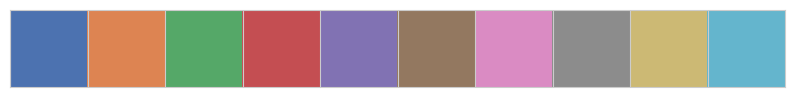

In [306]:
# Setup style untuk seaborn
palette = sns.color_palette("deep")
sns.palplot(palette)
sns.set_palette(palette)
sns.set_style("whitegrid")

### **V.1. Bagaimana performa penjualan masing-masing produk dan kategori produk pada periode 2016-2018?**

Pada bagian sebelumnya, yaitu **IV.1.**, kita telah menemukan 5 produk dan kategori produk dengan angka tertinggi. Berikut adalah visualisasi masing-masing.

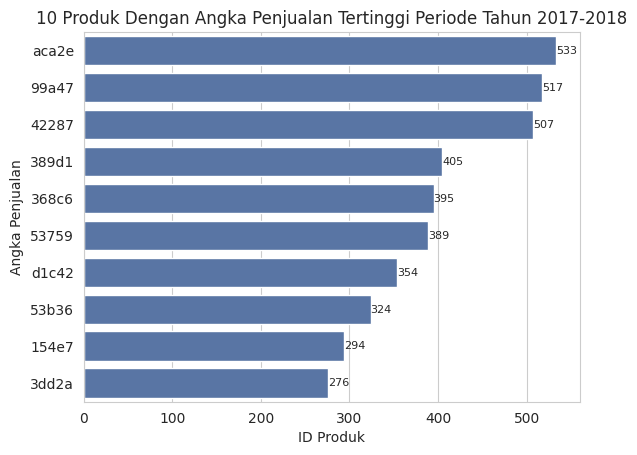

In [307]:
ax = sns.barplot(df_order_product_sell_count.head(10), x="count", y="product_id", estimator="sum", errorbar=None)
ax.set(xlabel="ID Produk", ylabel="Angka Penjualan", title="10 Produk Dengan Angka Penjualan Tertinggi Periode Tahun 2017-2018")
ax.bar_label(ax.containers[0], fontsize=8);


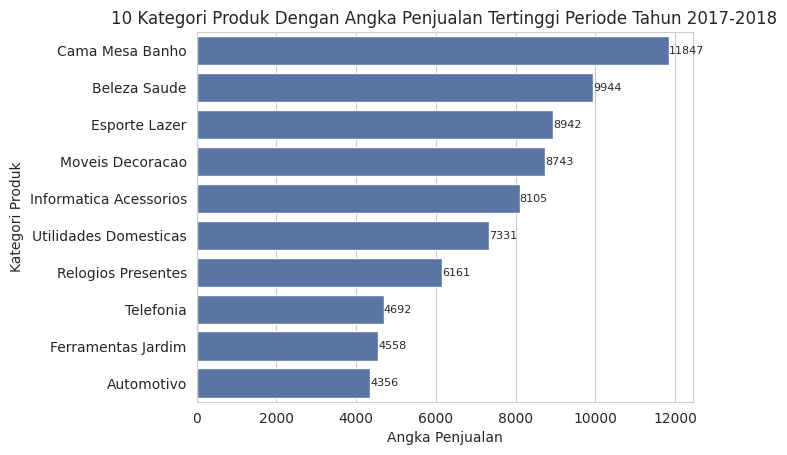

In [308]:
ax = sns.barplot(df_order_category_sell_count.head(10), x="count", y="product_category_name", estimator="sum", errorbar=None)
ax.set(xlabel="Angka Penjualan", ylabel="Kategori Produk", title="10 Kategori Produk Dengan Angka Penjualan Tertinggi Periode Tahun 2017-2018")
ax.bar_label(ax.containers[0], fontsize=8);

### **V.2. Bagaimana daerah sebaran customer pada periode 2016-2018?**

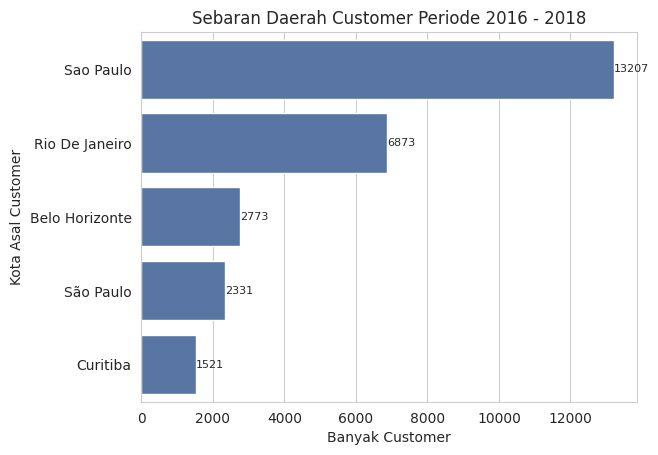

In [309]:
ax = sns.barplot(df_geolocation_city_count.head(), x="count", y="geolocation_city", estimator="sum", errorbar=None)
ax.set(xlabel="Banyak Customer", ylabel="Kota Asal Customer", title="Sebaran Daerah Customer Periode 2016 - 2018")
ax.bar_label(ax.containers[0], fontsize=8);

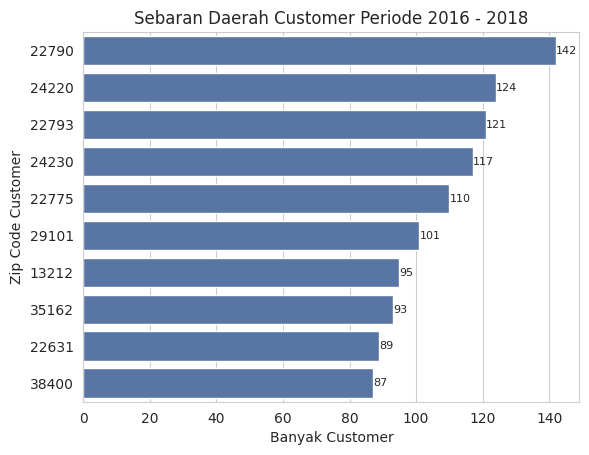

In [310]:
ax = sns.barplot(df_customers_zipcode_count.head(10), x="count", y="zip_code_prefix", estimator="sum", errorbar=None)
ax.set(xlabel="Banyak Customer", ylabel="Zip Code Customer", title="Sebaran Daerah Customer Periode 2016 - 2018")
ax.bar_label(ax.containers[0], fontsize=8);

## **VI. Conclusion**
---

Kesimpulan dari berbagai insights yang didapat pada tahapan sebelumnya.
1. Berdasarkan hasil analisis mengenai performa penjualan masing-masing produk dan kategori produk pada tahun 2016-2018, didapat bahwa produk dengan angka penjualan paling tinggi adalah produk dengan `product_id: aca2eb7d00ea1a7b8ebd4e68314663af` dan kategori produk paling laris adalah Cama Mesa Banho.
2. Berdasarkan hasil analisis mengenai sebaran daerah customer pada periode 2016-2018, didapat bahwa mayoritas customer berasal dari kota San Fransisco dengan jumlah yang signifikan yaitu sekitar 13 ribu customer, diikuti dengan kota Rio de Janeiro dengan jumlah sekitar 6 ribu customer. Kode pos dengan customer terbanyak adalah 22790 dengan jumlah sekitar 142 customer.